In [1]:
#### Importing Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [2]:
### Reading Dataset
air = pd.read_excel(r'C:\Users\rayad\OneDrive\Documents\DataScience_Assignments\Forecast\Airlines+Data.xlsx')
air.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [3]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


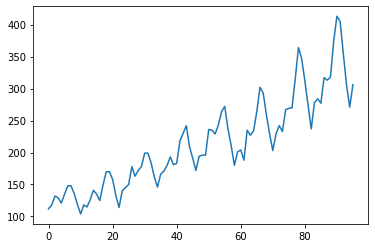

In [4]:
air.Passengers.plot()

In [5]:
air.shape

(96, 2)

In [6]:
air['Date'] = pd.to_datetime(air.Month, format='%b-%y')
air['Month'] = air.Date.dt.strftime('%b')
air['Year'] = air.Date.dt.strftime('%Y')

In [7]:
air.head()

,Month,Passengers,Date,Year
0,Jan,112,1995-01-01,1995
1,Feb,118,1995-02-01,1995
2,Mar,132,1995-03-01,1995
3,Apr,129,1995-04-01,1995
4,May,121,1995-05-01,1995


In [8]:
air['t'] = np.arange(1,97)

In [9]:
air['t_squared'] = air['t']*air['t']

In [10]:
air['Log_Passengers'] = np.log(air['Passengers'])

In [11]:
air.head()

,Month,Passengers,Date,Year,t,t_squared,Log_Passengers
0,Jan,112,1995-01-01,1995,1,1,4.718499
1,Feb,118,1995-02-01,1995,2,4,4.770685
2,Mar,132,1995-03-01,1995,3,9,4.882802
3,Apr,129,1995-04-01,1995,4,16,4.859812
4,May,121,1995-05-01,1995,5,25,4.795791


In [12]:
months = pd.get_dummies(air['Month'])

In [13]:
air = pd.concat([air, months], axis=1)
air.head()

,Month,Passengers,Date,Year,t,t_squared,Log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,Jan,112,1995-01-01,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,Feb,118,1995-02-01,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,Mar,132,1995-03-01,1995,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,Apr,129,1995-04-01,1995,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,May,121,1995-05-01,1995,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0


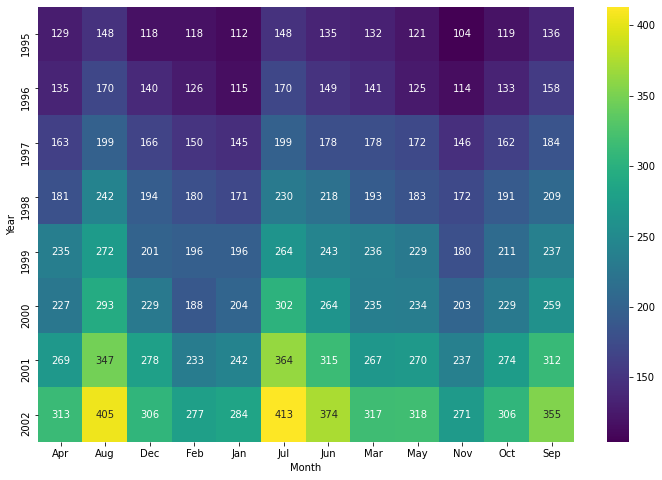

In [14]:
plt.figure(figsize=(12,8))
heatmap_month = pd.pivot_table(data=air, values='Passengers', index='Year', columns='Month',aggfunc='mean', fill_value=0)
sns.heatmap(heatmap_month, annot=True, fmt='g', cmap='viridis')


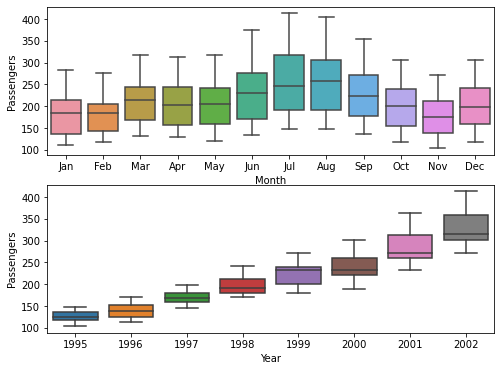

In [15]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x = 'Month', y='Passengers', data = air)
plt.subplot(212)
sns.boxplot(x = 'Year', y='Passengers', data=air)

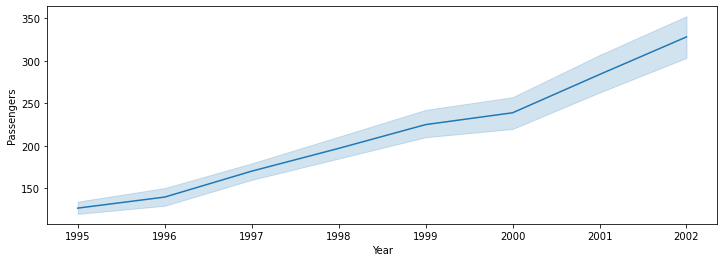

In [16]:
plt.figure(figsize=(12,4))
sns.lineplot(x ='Year', y='Passengers', data=air)

In [17]:
Train_data = air.head(86)
Test_data = air.tail(10)

In [18]:
from statsmodels.formula.api import ols

In [19]:
### Linear Model
linear_model = ols('Passengers~t', data=air).fit()
pred_linear = linear_model.predict(pd.DataFrame(Test_data['t']))
rmse_linear = np.sqrt(np.mean((np.array(Test_data['Passengers'])-np.array(pred_linear))**2))
rmse_linear

51.93950342982208

In [21]:
## Exponential Model
exp_model = ols('Log_Passengers~t', data=air).fit()
pred_exp = exp_model.predict(pd.DataFrame(Test_data['t']))
rmse_exp = np.sqrt(np.mean((np.array(Test_data['Passengers'])-np.array(pred_exp))**2))
rmse_exp

334.9658910914793

In [23]:
### Quadratic Model
Quad_model = ols('Passengers~t+t_squared', data=air).fit()
pred_Quad = Quad_model.predict(pd.DataFrame(Test_data[['t', 't_squared']]))
rmse_Quad = np.sqrt(np.mean((np.array(Test_data['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

48.69909251786942

In [26]:
Test_data.iloc[:, 7:19]

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
86,0,0,0,0,0,0,0,1,0,0,0,0
87,1,0,0,0,0,0,0,0,0,0,0,0
88,0,0,0,0,0,0,0,0,1,0,0,0
89,0,0,0,0,0,0,1,0,0,0,0,0
90,0,0,0,0,0,1,0,0,0,0,0,0
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0
95,0,0,1,0,0,0,0,0,0,0,0,0


In [32]:
### Additive Seasonality Model
add_sea_model = ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec', data=air).fit()
pred_add_sea = pd.Series(add_sea_model.predict(Test_data.iloc[:, 7:19]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test_data['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

119.69134132216922

In [38]:
### Additive Seasonality Quadrant Model
add_sea_quad_model = ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec', data=air).fit()
pred_add_sea_quad = pd.Series(add_sea_quad_model.predict(Test_data))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test_data['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

21.543408269087333

In [41]:
## Multiplicative Seasonality Model
Mul_sea_model = ols('Log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec', data=air).fit()
pred_Mul_sea = pd.Series(Mul_sea_model.predict(Test_data))
rmse_Mul_sea = np.sqrt(np.mean((np.array(Test_data['Passengers'])-np.array(np.exp(pred_Mul_sea)))**2))
rmse_Mul_sea

130.3948405910519

In [45]:
### Mulitplicative Additive Seasonality
Mul_add_sea_model = ols('Log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec', data=air).fit()
pred_Mul_add_sea = pd.Series(Mul_add_sea_model.predict(Test_data))
rmse_Mul_add_sea = np.sqrt(np.mean((np.array(Test_data['Passengers'])-np.array(np.exp(pred_Mul_add_sea)))**2))
rmse_Mul_add_sea

9.630004440991097

In [50]:
rmse_data = {"MODEL":pd.Series(["Linear","Exponential","Quadratic","Additive Seasonality","Additive Seasonality Quadratic","Multiplicative Seasonality","Mulitplicative Additive Seasonality"]),"RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mul_sea,rmse_Mul_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,Mulitplicative Additive Seasonality,9.630004
4,Additive Seasonality Quadratic,21.543408
2,Quadratic,48.699093
0,Linear,51.939503
3,Additive Seasonality,119.691341
5,Multiplicative Seasonality,130.394841
1,Exponential,334.965891
